# Stock Market Analysis By IrdinaZai

Problem Statements
> analyzing the historical performance of different companies

> identifying potential opportunities

> identifying risks in the stock market

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf #stock data from yahoo finance
from datetime import datetime

In [2]:
#Define stocks list
stocks_list = ["AAPL",
              "AMZN",
              "NFLX",
              "GOOG",
              "META"]

#Set date range
start = datetime(datetime.now().year - 1,
                datetime.now().month,
                datetime.now().day)

end = datetime.now()

data = yf.download(stocks_list,start=start, end=end)
print(data.head())

[*********************100%%**********************]  5 of 5 completed

Price        Adj Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2023-07-19  194.069351  135.360001  122.640442  315.361969  477.589996   
2023-07-20  192.109756  129.960007  119.394135  301.899628  437.420013   
2023-07-21  190.926056  130.000000  120.173248  293.656555  427.500000   
2023-07-24  191.731766  128.800003  121.741463  291.011963  428.369995   
2023-07-25  192.597168  129.130005  122.650429  293.866119  427.700012   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2023-07-19  195.100006  135.360001  122.779999  316.010010  477.589996  ...   
2023-07-20  193.130005  129.960007  119.529999  302.519989  437.420013  ...   
2023-07-21  

In [3]:
print(data.tail())

Price        Adj Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2024-07-12  230.539993  194.490005  186.779999  498.869995  647.599976   
2024-07-15  234.399994  192.720001  188.190002  496.160004  656.450012   
2024-07-16  234.820007  193.020004  185.500000  489.790009  656.320007   
2024-07-17  228.880005  187.929993  182.619995  461.989990  647.460022   
2024-07-18  224.179993  183.750000  179.220001  475.850006  643.039978   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2024-07-12  230.539993  194.490005  186.779999  498.869995  647.599976  ...   
2024-07-15  234.399994  192.720001  188.190002  496.160004  656.450012  ...   
2024-07-16  

In [4]:
data = data.reset_index()

In [5]:
#check data summary statistics
print(data.describe())

Price    Adj Close                                                  \
Ticker        AAPL        AMZN        GOOG        META        NFLX   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    185.602560  159.238135  148.093470  398.711045  522.697025   
std      14.508680   22.602136   18.418251   86.005008   98.814034   
min     164.776505  119.570000  119.394135  282.669128  346.190002   
25%     174.801846  138.202496  134.339622  314.022224  434.377487   
50%     183.502808  154.699997  140.799774  374.540344  491.975006   
75%     191.941902  180.095001  157.770462  485.877594  613.820007   
max     234.820007  200.000000  192.660004  539.909973  690.650024   

Price        Close                                                  ...  \
Ticker        AAPL        AMZN        GOOG        META        NFLX  ...   
count   252.000000  252.000000  252.000000  252.000000  252.000000  ...   
mean    186.027341  159.238135  148.239603  399.271588  522.697025  ...   

In [6]:
#Create new dataFrame
AAPL_data = yf.download("AAPL", start=start, end=end)['Close']
AMZN_data = yf.download("AMZN", start=start, end=end)['Close']
GOOG_data = yf.download("GOOG", start=start, end=end)['Close']
NFLX_data = yf.download("NFLX", start=start, end=end)['Close']
META_data = yf.download("META", start=start, end=end)['Close']

# Combine all data into a single DataFrame
stocks_data = pd.concat([AAPL_data, AMZN_data, GOOG_data, NFLX_data, META_data], axis=1)
stocks_data.columns = ['AAPL', 'AMZN', 'GOOG', 'NFLX', 'META']  # Set column names

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
# Descriptive statistics
descriptive_stats = stocks_data.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Dispersion measures (Standard Deviation and Variance)
std_dev = stocks_data.std()
variance = stocks_data.var()
print("\nStandard Deviation:")
print(std_dev)
print("\nVariance:")
print(variance)


Descriptive Statistics:
             AAPL        AMZN        GOOG        NFLX        META
count  252.000000  252.000000  252.000000  252.000000  252.000000
mean   186.027341  159.238135  148.239603  522.697025  399.271588
std     14.404462   22.602136   18.395724   98.814034   85.893584
min    165.000000  119.570000  119.529999  346.190002  283.250000
25%    175.370007  138.202496  134.492496  434.377487  314.667503
50%    183.989998  154.699997  140.959999  491.975006  375.309998
75%    192.447498  180.095001  157.949997  613.820007  486.360001
max    234.820007  200.000000  192.660004  690.650024  539.909973

Standard Deviation:
AAPL    14.404462
AMZN    22.602136
GOOG    18.395724
NFLX    98.814034
META    85.893584
dtype: float64

Variance:
AAPL     207.488520
AMZN     510.856558
GOOG     338.402670
NFLX    9764.213361
META    7377.707791
dtype: float64


 - Based on above, it can be seen that AAPL relatively low volativity compared to other stocks. Meanwhile AMZN and GOOG showing moderate volativity as their daily closing prices fluctuate more widely around their mean.

 - META and NFLX both has the standard deviation of 84.099468 and 92.359097 respectively. These stocks are considered more volatile as their closing prices have larger fluctuations over short periods, which can present both opportunities and risks for investors.

### Time Series for Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. 
A stock’s closing price is the standard benchmark used by investors to track its performance over time.

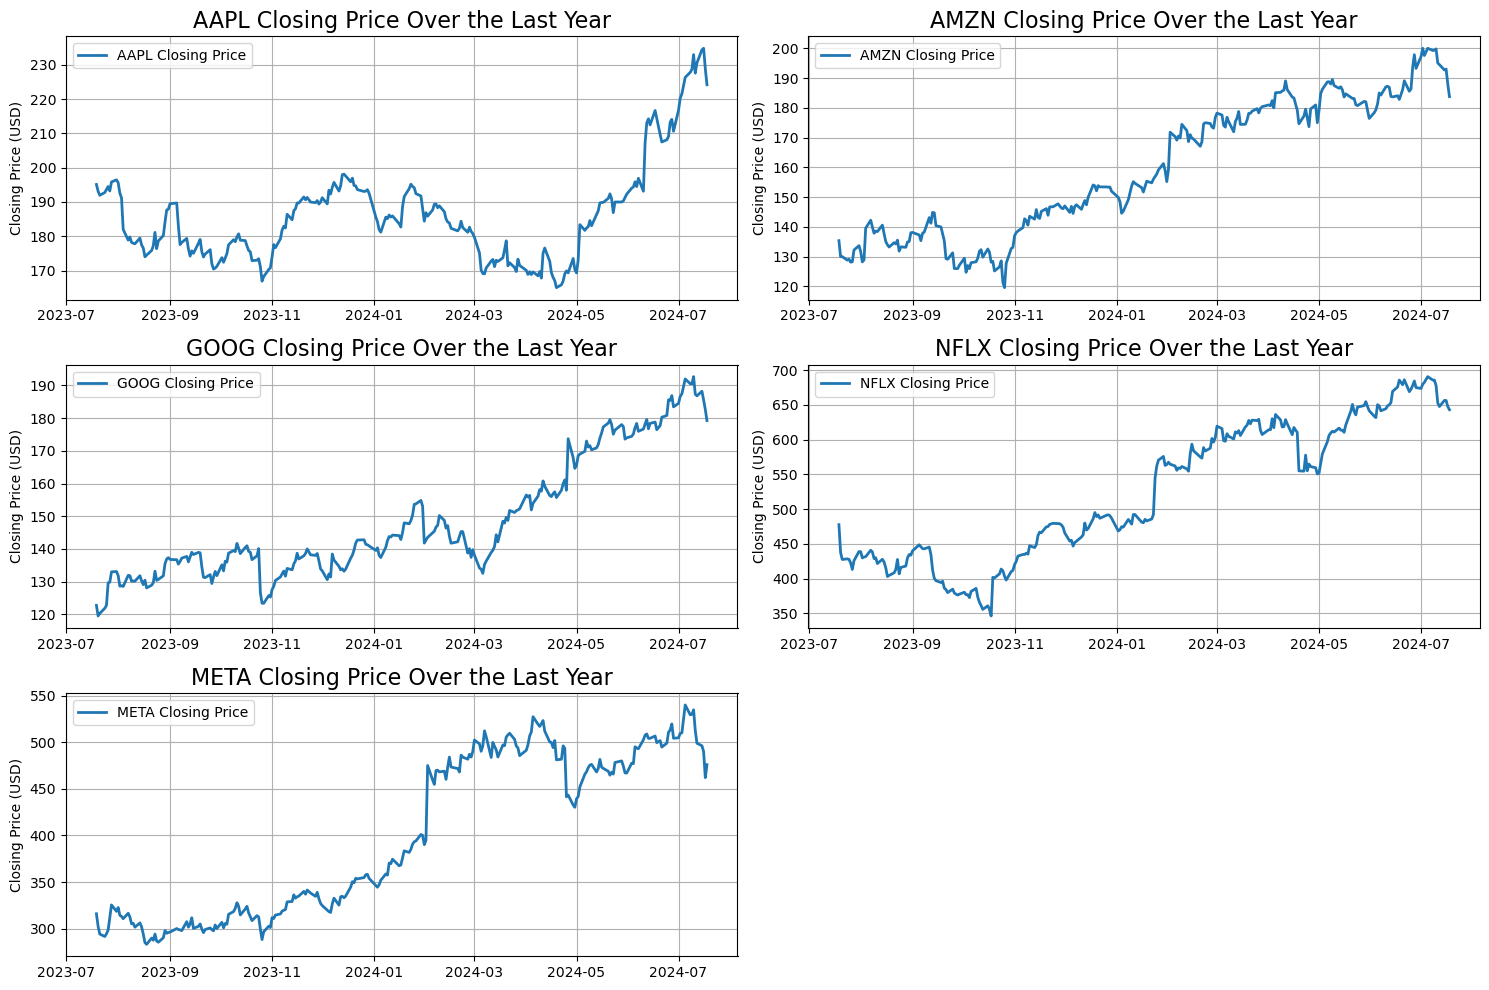

In [8]:
# Plot each stock's historical closing price in a grid
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, c in enumerate(stocks_data.columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(stocks_data.index, stocks_data[c], label=f'{c} Closing Price', linewidth=2)
    plt.title(f'{c} Closing Price Over the Last Year', fontsize=16)
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()   


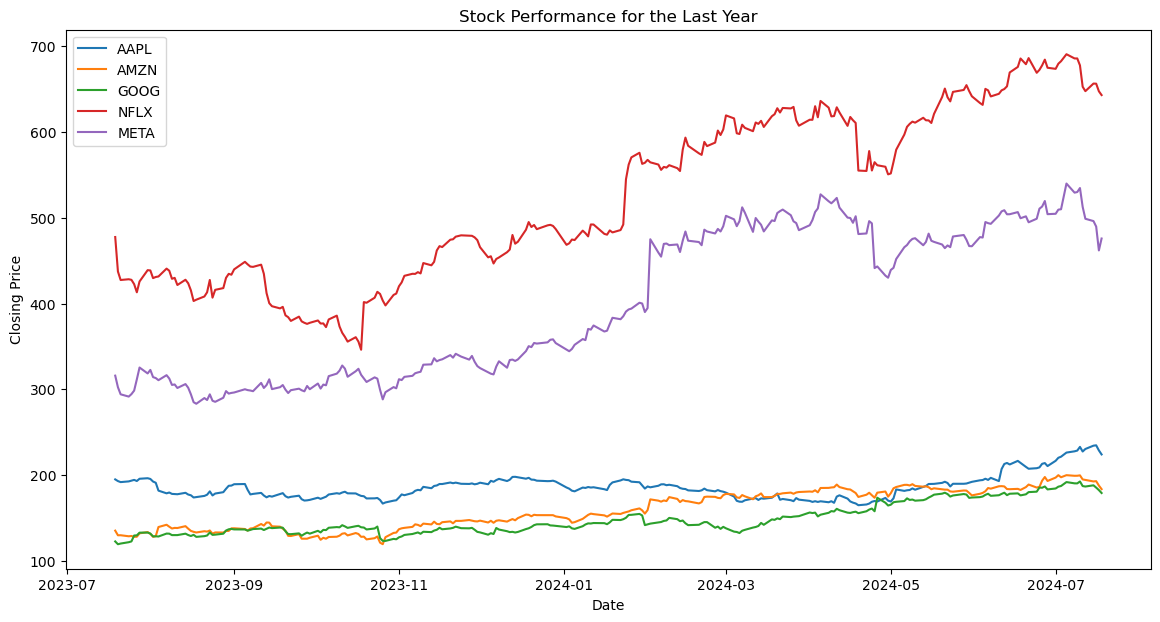

In [9]:
# Plot each stock's performance over the last year
plt.figure(figsize=(14, 7))
for column in stocks_data.columns:
    plt.plot(stocks_data.index, stocks_data[column], label=column)

plt.title('Stock Performance for the Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [10]:
stocks_data.columns

Index(['AAPL', 'AMZN', 'GOOG', 'NFLX', 'META'], dtype='object')

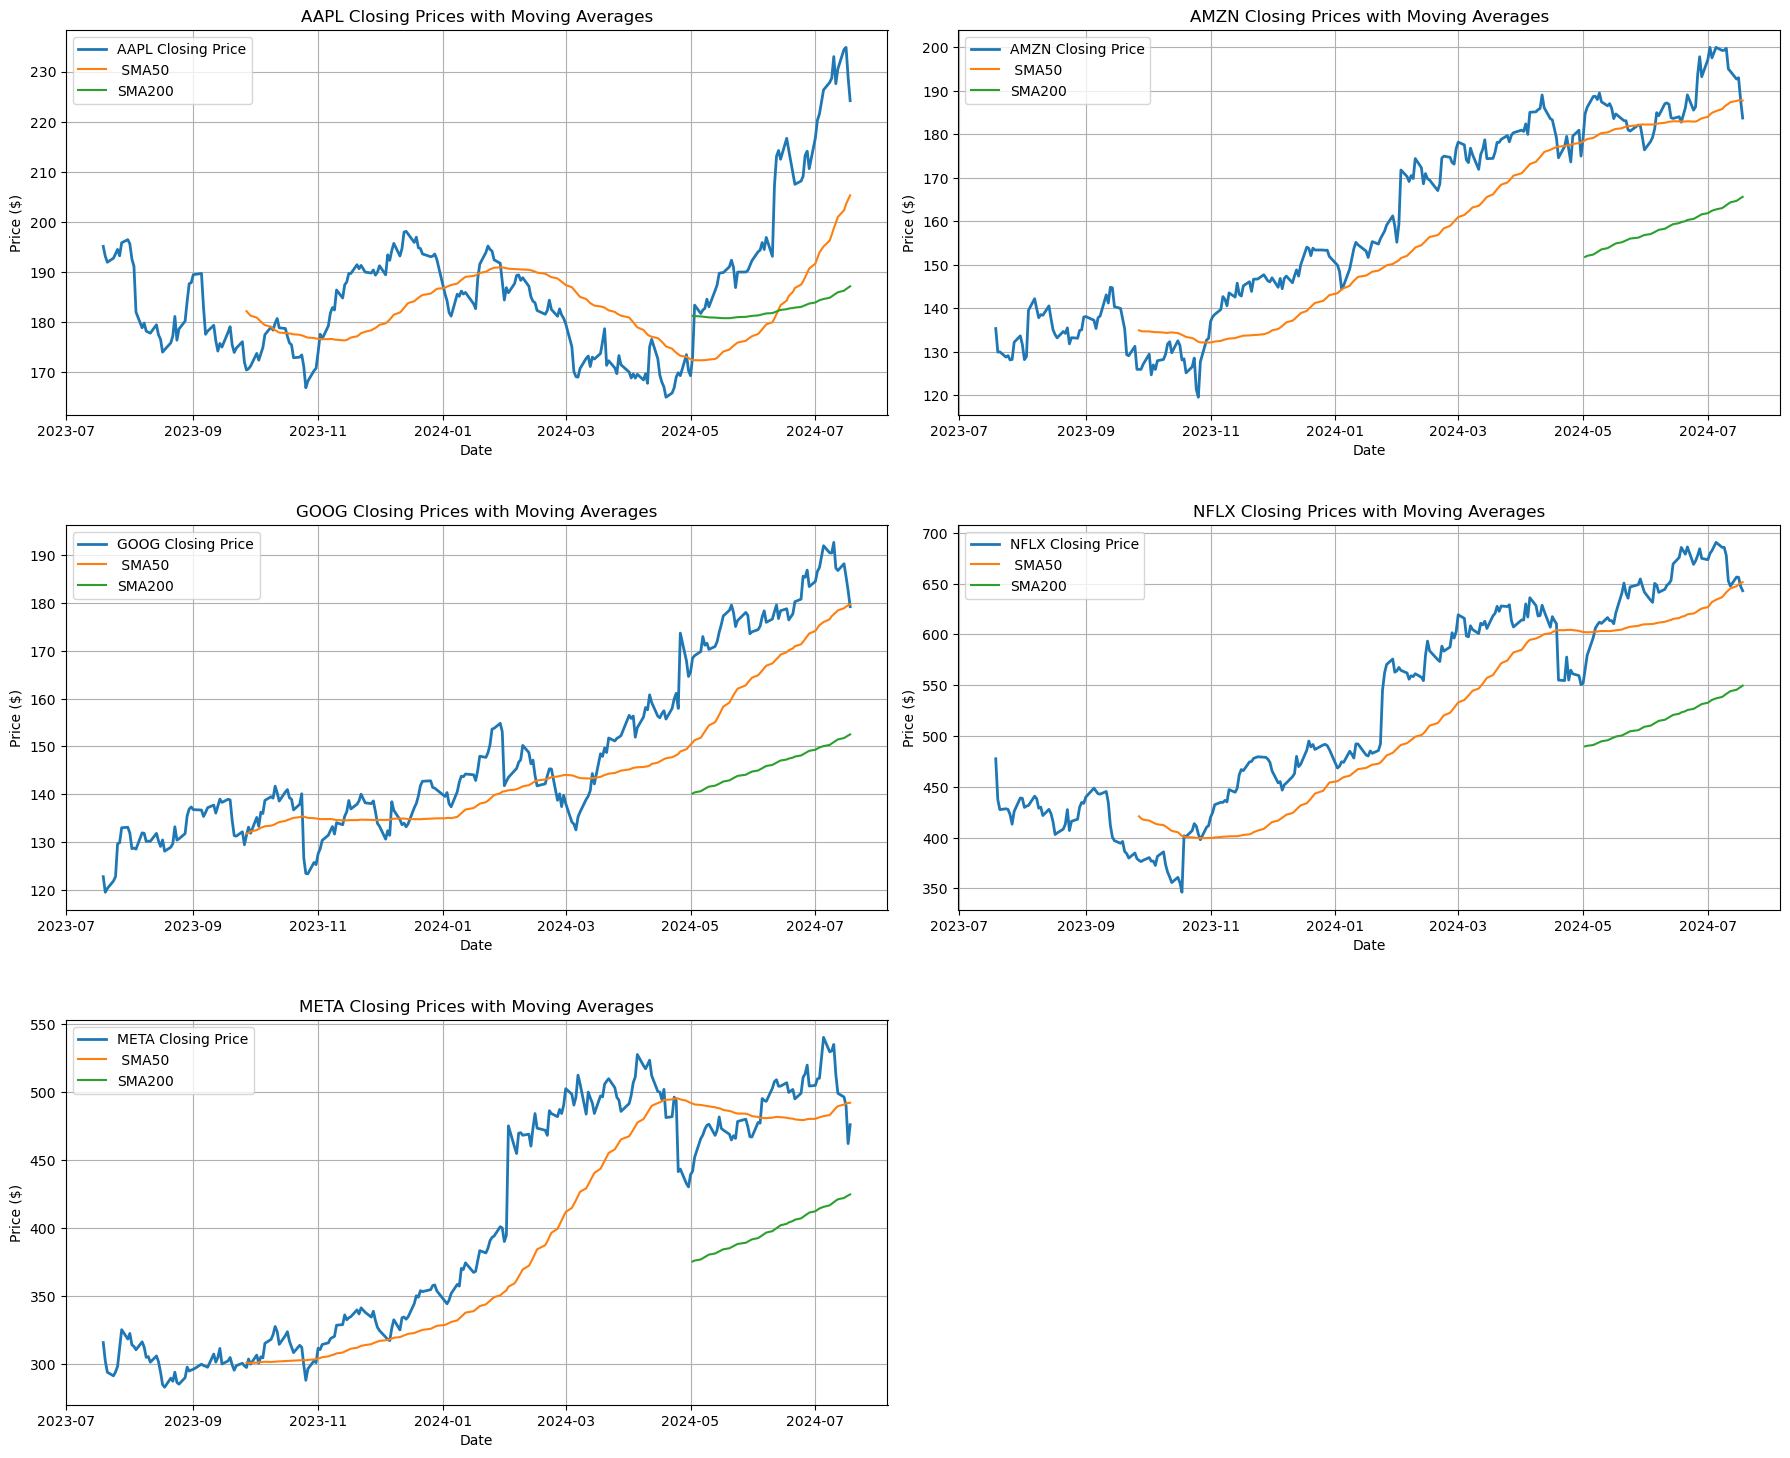

In [11]:
# Plot each stock's historical closing price in a grid with SMAs
plt.figure(figsize=(18, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, c in enumerate(stocks_data.columns, 1):
    plt.subplot(3, 2, i)
    
    SMA_50 = stocks_data[c].rolling(window=50).mean()
    SMA_200 = stocks_data[c].rolling(window=200).mean()

    plt.plot(stocks_data.index, stocks_data[c], label=f'{c} Closing Price', linewidth=2)
    plt.plot(stocks_data.index, SMA_50, label=' SMA50', linewidth=1.5)
    plt.plot(stocks_data.index, SMA_200, label='SMA200', linewidth=1.5)

    plt.title(f'{c} Closing Prices with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

The output shows five different graph for each company. This shows that when MA50 crosses above the MA200, it is considered a bullish signal indicating that the stock price will continue to rise. Conversely, when the MA50 crosses below the MA200, it is a bearish signal that the stock price will continue falling.

In [12]:
#Correlation matrix for each stocks
corr_matrix = stocks_data.corr()
print('Correlation matrix: ')
print(corr_matrix)

Correlation matrix: 
          AAPL      AMZN      GOOG      NFLX      META
AAPL  1.000000  0.356029  0.557201  0.396169  0.241969
AMZN  0.356029  1.000000  0.855880  0.969489  0.961096
GOOG  0.557201  0.855880  1.000000  0.826021  0.774078
NFLX  0.396169  0.969489  0.826021  1.000000  0.956780
META  0.241969  0.961096  0.774078  0.956780  1.000000


Correlation shows the relationship between two variables.he correlation coefficient values range from -1 to 1 where;
 - 1 indicates a perfect positive correlation, meaning the stocks move exactly in sync.
 - 0 indicates no correlation, meaning the stocks' movements are completely independent.
 - -1 indicates a perfect negative correlation, meaning the stocks move exactly in opposite directions.
 

In this case, one stock's price increases, the other stock's price also tends to increase, and vice versa implying high correlation.

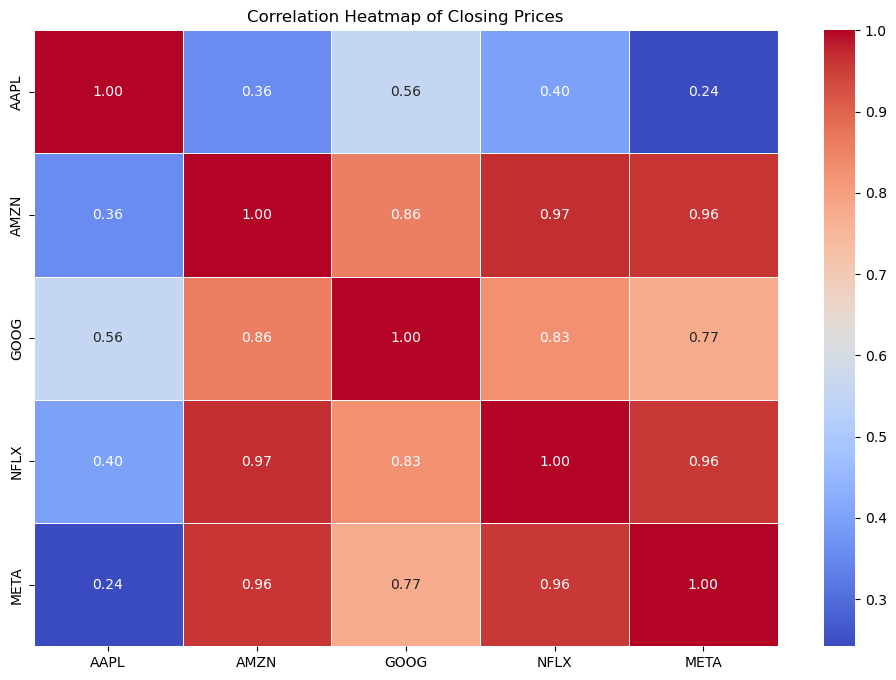

In [13]:
#Visualise in heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt =".2f",linewidth=0.5)
plt.title("Correlation Heatmap of Closing Prices")
plt.show()

Interpretation of the Correlation Matrix:

 - AAPL has weak positive correlations with AMZN, NFLX and META. 
 - AAPL and GOOG has a moderate positive correlation
 - AMZN and GOOG has a strong positive correlation (0.86)
 - AMZN has very strong positive correlation with NFLX and META.
 - GOOG has high positive correlations with AMZN, NFLX and META.
 - NLFX has a very strong correlation with META (0.96) shows that they move in a similar pattern.

### Highest price trend for the past 3 months

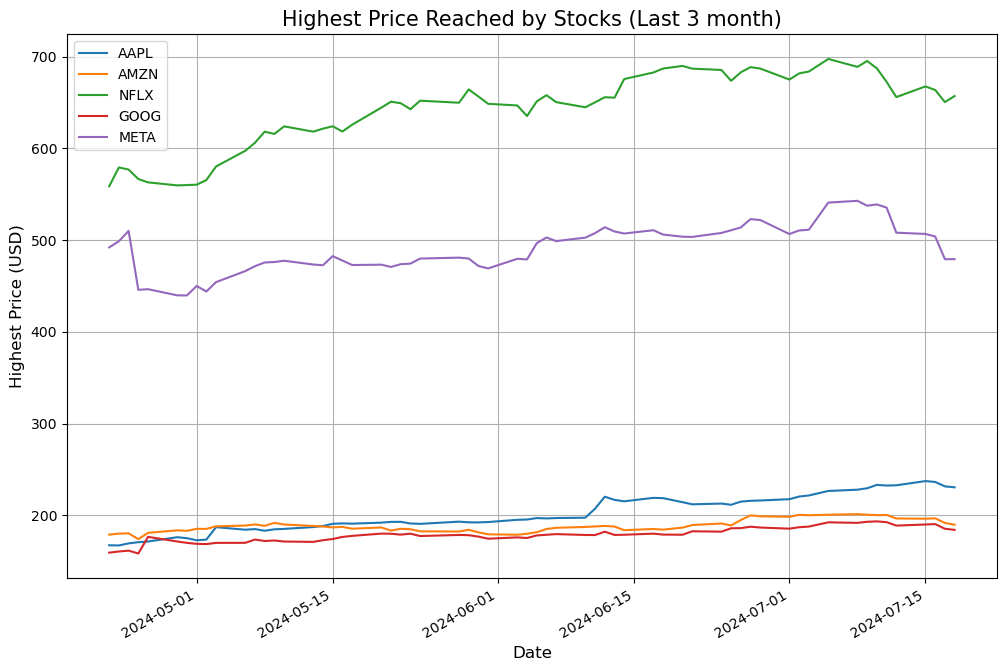

In [21]:
from datetime import timedelta
# Define stocks list
stocks_list = ["AAPL", "AMZN", "NFLX", "GOOG", "META"]

# Set date range for the past 3 months (90 days)
start_date = end_date - timedelta(days=90)
end_date = datetime.now()

#set figure size
plt.figure(figsize=(12, 8))
# Loop through each stock and plot the 'High' prices for the last 3 month
for symbol in stocks_list:
    stock_data = data[symbol]
    data_lastmonth = stock_data.loc[start_date:end_date]
    data_lastmonth['High'].plot(label=f'{symbol}')

plt.title('Highest Price Reached by Stocks (Last 3 month)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Highest Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Daily Returns

To measure the daily performance of a stock daily returns can be calculated using a formula.


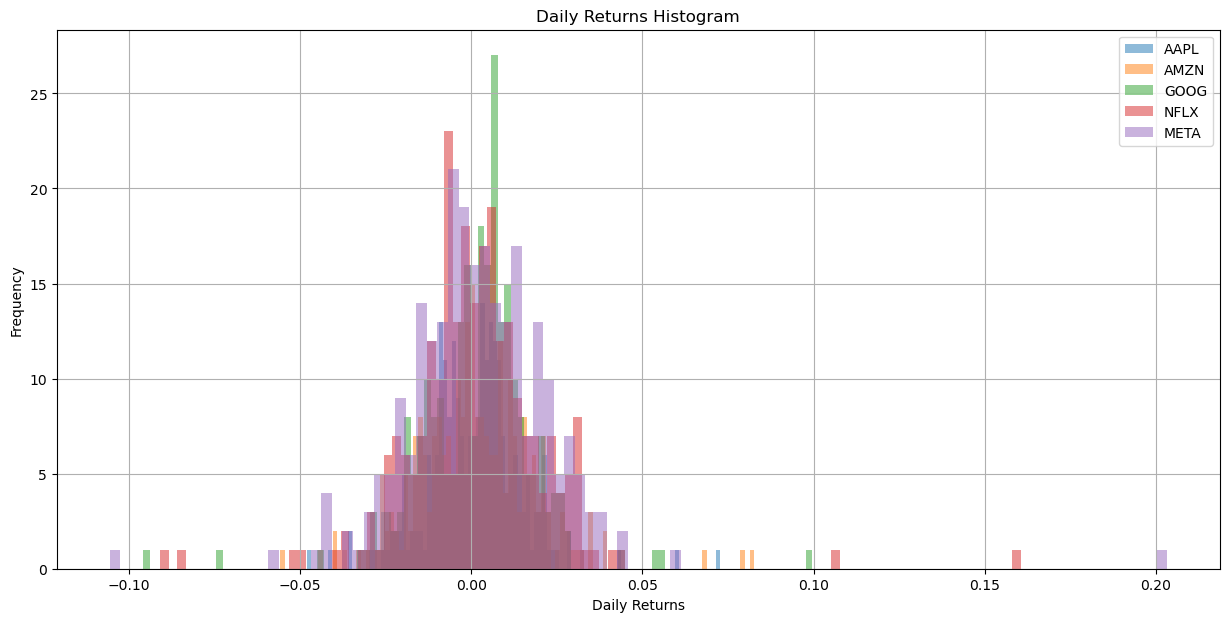

In [32]:
# Calculate daily returns from closing prices
daily_returns = stocks_data.pct_change()
daily_returns.dropna(inplace=True)  # Drop NaN values

# Plot histograms of daily returns
plt.figure(figsize=(15, 7))
for symbol in daily_returns.columns:
    daily_returns[symbol].hist(bins=100, label=symbol, alpha=0.5)

plt.title('Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Volume

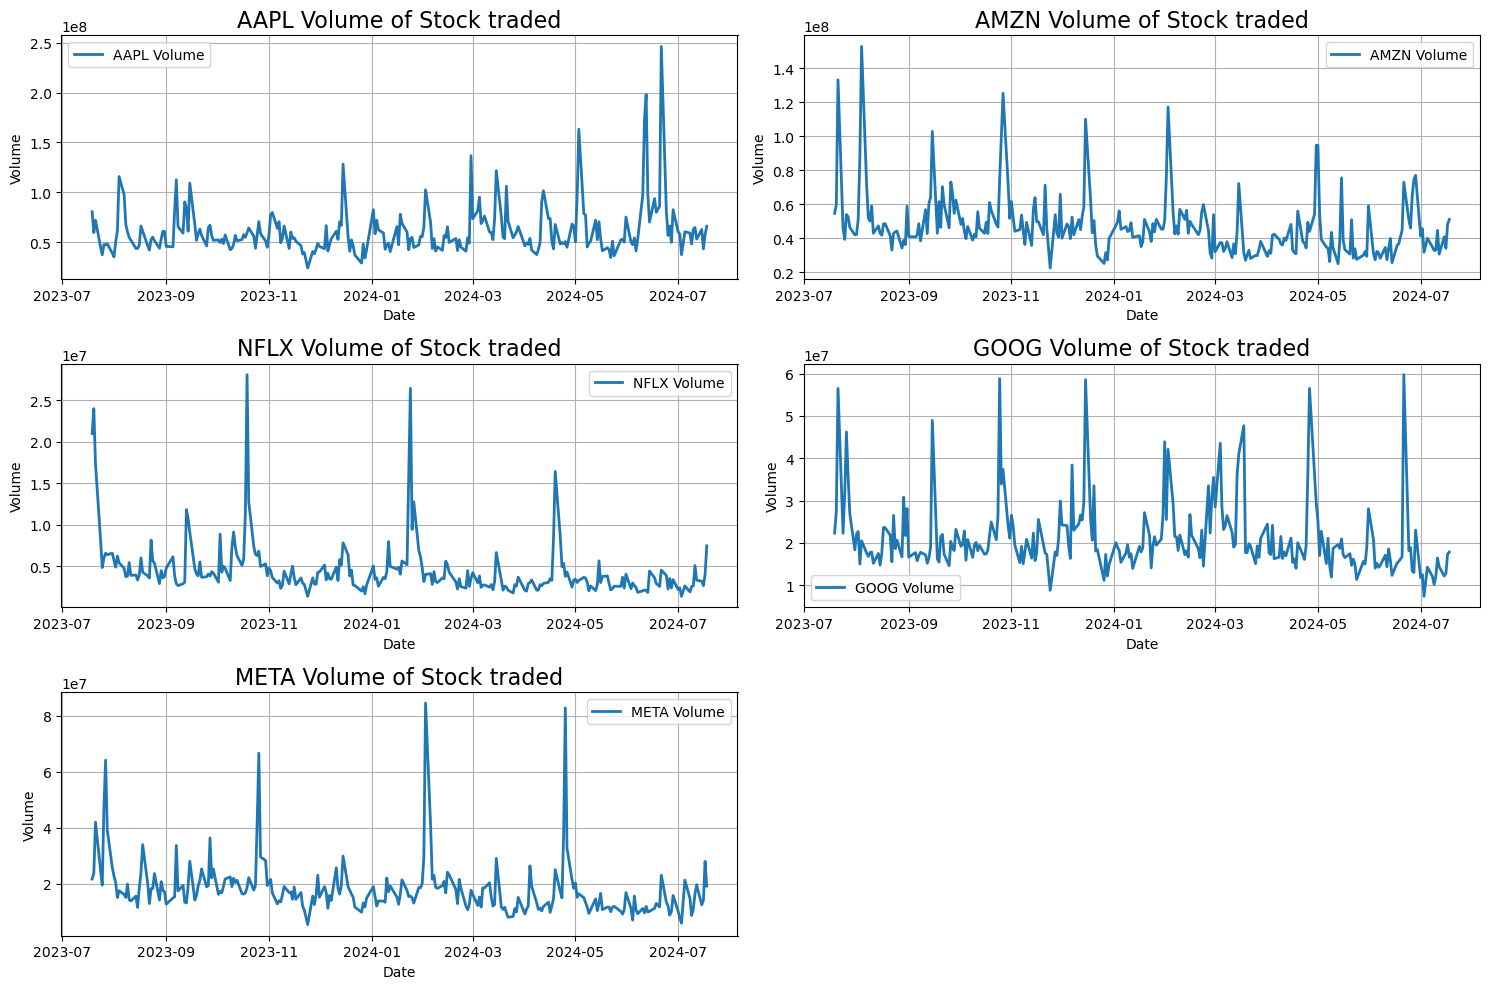

In [38]:
# Plot each stock's historical closing price in a grid
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, symbol in enumerate(stocks_list, 1):    
    plt.subplot(3, 2, i)
    stock_data = data[symbol]
    plt.plot(stock_data.index, stock_data['Volume'], label=f'{symbol} Volume', linewidth=2)    
    plt.title(f'{symbol} Volume of Stock traded', fontsize=16)
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()   


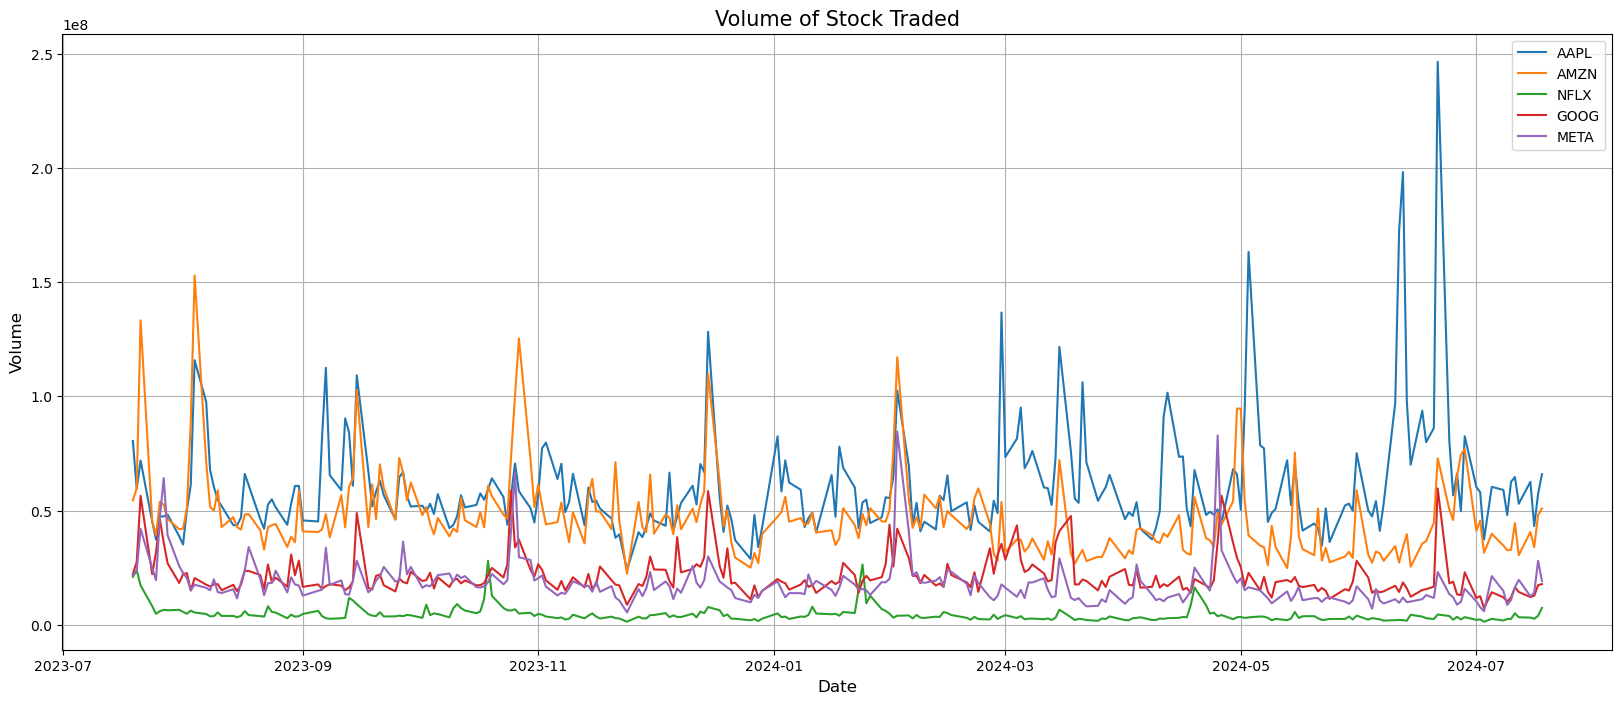

In [46]:
#lets compare the stocks volume in one graph
plt.figure(figsize=(20, 8))

for symbol in stocks_list:
    stock_data = data[symbol]
    plt.plot(stock_data.index, stock_data['Volume'], label=symbol)

plt.title('Volume of Stock Traded', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

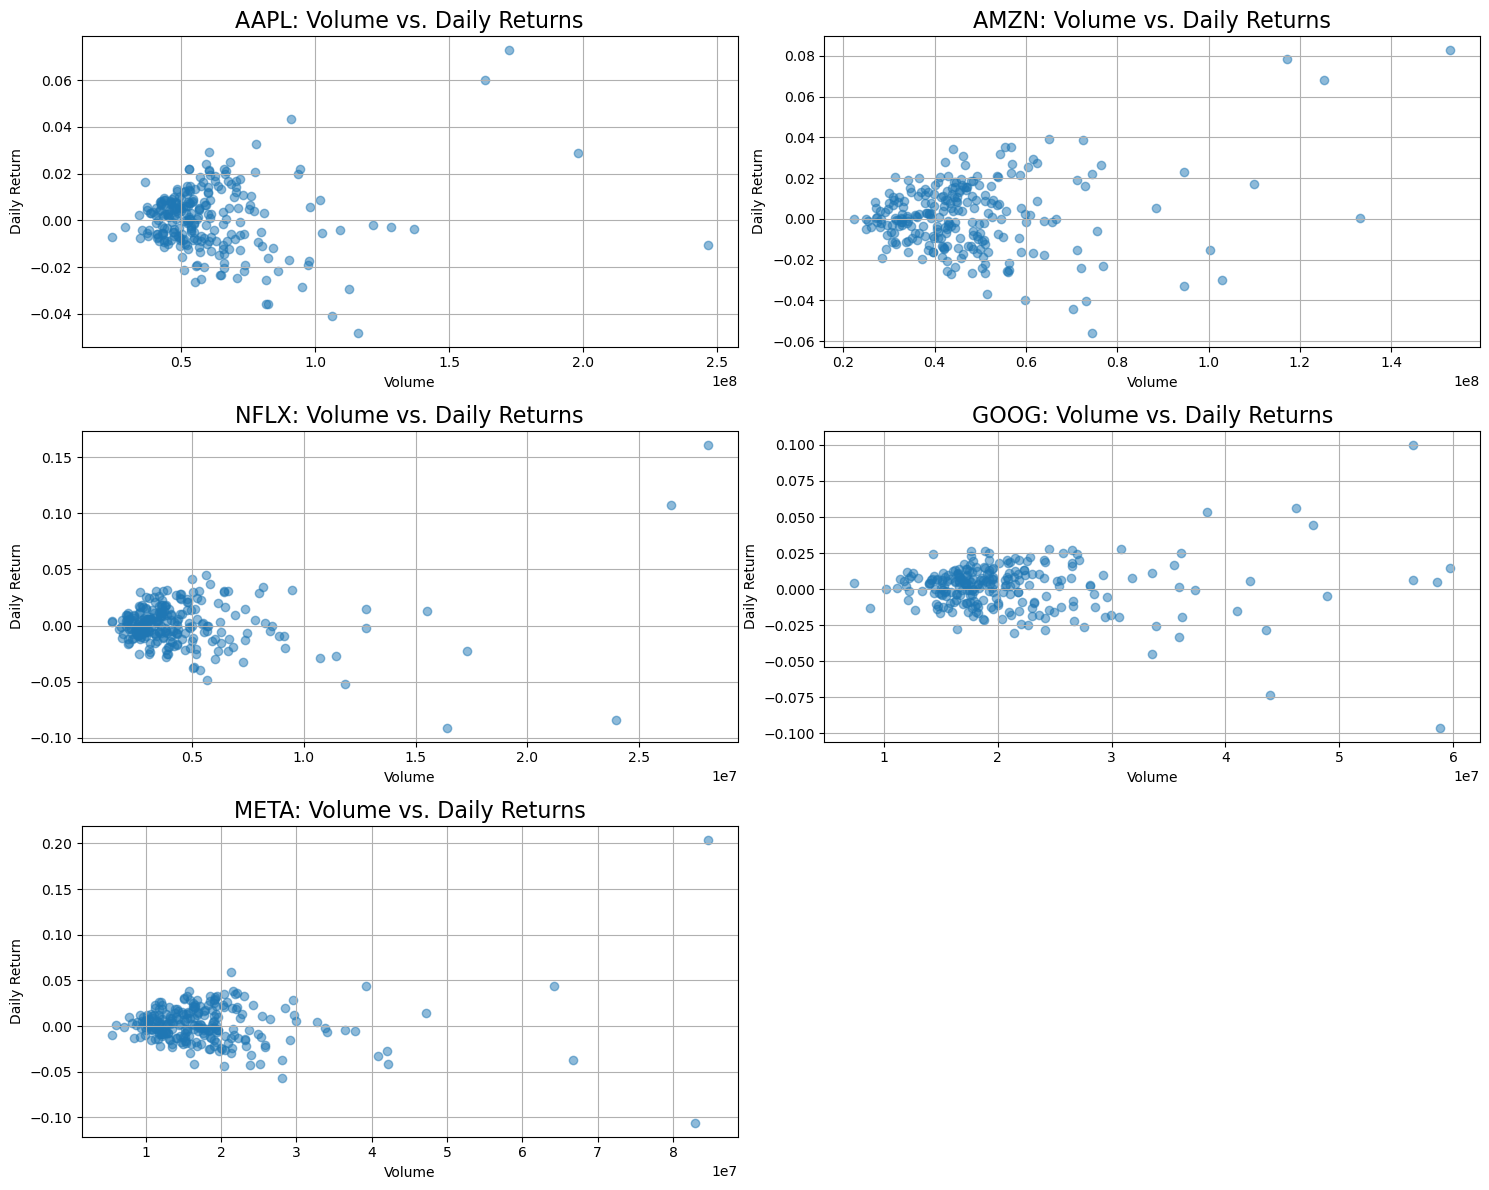

In [40]:
# Lets see the relationship between volume and daily returns

# 1. Calculate daily returns from closing prices
# Calculate daily returns
daily_returns = pd.DataFrame()
for symbol in stocks_list:
    stock_data = data[symbol]
    daily_returns[symbol] = stock_data['Close'].pct_change()

daily_returns.dropna(inplace=True)

# Plot scatter plots of volume vs. daily returns
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, symbol in enumerate(stocks_list, 1):
    plt.subplot(3, 2, i)
    stock_data = data[symbol]
    # Merge the data 
    merged_data = pd.DataFrame({
        'Volume': stock_data['Volume'],
        'Daily Return': daily_returns[symbol]
    }).dropna() 
    
    plt.scatter(merged_data['Volume'], merged_data['Daily Return'], alpha=0.5)
    plt.title(f'{symbol}: Volume vs. Daily Returns', fontsize=16)
    plt.xlabel('Volume')
    plt.ylabel('Daily Return')
    plt.grid(True)

plt.tight_layout()
plt.show()

From the graphs above, it shows that there is no clear consistent relationship between stock volume and daily return.

### Risk Vs. Expected Return

Lets see the relationship between the risk and expected return for the stocks. To calculate the risk we will be using the standard deviation of returns and means of returns is used for the expected returns.

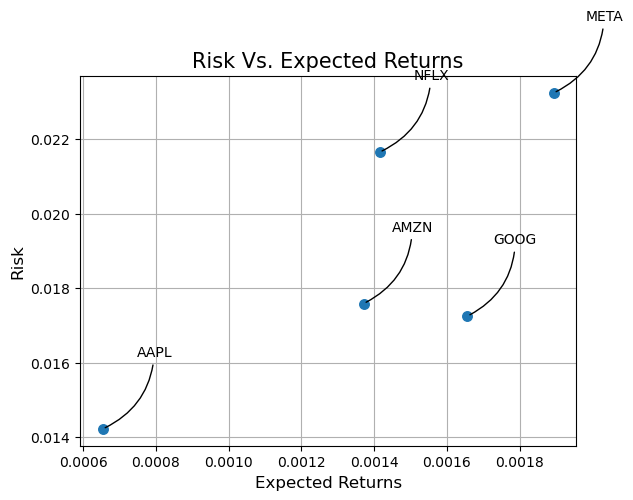

In [47]:
returns = stocks_data.pct_change().dropna()

circles_area = np.pi * 15
plt.scatter(x = returns.mean(),
           y = returns.std(),
           s = circles_area)

for label,x,y in zip(returns.columns,
                    returns.mean(),
                    returns.std()):
    plt.annotate(label,
                xy = (x,y),
                xytext = (50,50),
                textcoords = "offset points",
                ha = "right",
                va = "bottom",
                arrowprops = dict(arrowstyle = "-",
                                 connectionstyle = "arc3, rad = -0.3"))
plt.title('Risk Vs. Expected Returns', fontsize=15)
plt.xlabel('Expected Returns', fontsize=12)
plt.ylabel('Risk', fontsize=12)
plt.grid(True)
plt.show()

As seen from above, 
 - Meta has highest risk, and with highest expected returns
 - GOOG has moderate risk but high expected returns
 - NFLX and AMZN has around similar expected return however AMZN has lower risk compared to NFLX
 - AAPL has the lowest risk with the lowest expected returns

### Stocks performance over the last year

In [49]:
# Calculate and display performance metrics
performance_metrics = stocks_data.apply(lambda x: (x[-1] - x[0]) / x[0] * 100)
print("Performance Metrics (Percentage Change Over the Last Year):")
print(performance_metrics)

Performance Metrics (Percentage Change Over the Last Year):
AAPL    14.905169
AMZN    35.749113
GOOG    45.968401
NFLX    34.642682
META    50.580675
dtype: float64
